In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from PIL import Image
from dr_analysis_tools import get_exp_list_dr

In [11]:
templeton_path = r'\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings'
dr_path = r'\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot'
save_path = r'\\allen\programs\mindscope\workgroups\dynamicrouting\cabasco\composite_surface_images'

In [23]:
def get_image_path_list_dr(mouse_id, exp_list):
    image_path_list = []
    for session in exp_list:
        s_path = os.path.join(dr_path, session)
        s_list = os.listdir(s_path)
        if len(s_list) > 13:
            for s in s_list:
                if s.__contains__('pre_insertion'):
                    full_path = os.path.join(s_path, s)
                    image_path_list.append(full_path)
    return image_path_list

In [24]:
def make_comp_img(image_path_list, savename):
    grid_size = math.ceil(math.sqrt(len(image_path_list)))

    # Create plt plot:
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 15))

    current_file_number = 0
    for path in image_path_list:
        x_position = current_file_number % grid_size
        y_position = current_file_number // grid_size
        im = Image.open(path)
        axes[x_position, y_position].imshow(im)
        axes[x_position, y_position].set_title(path[-40:-32])
        current_file_number += 1

    plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    
    #plt.savefig(savename, bbox_inches='tight')

In [20]:
# make images from a list of MIDs
mouse_ids = [660023, 666986, 662892, 668755]
for mouse_id in mouse_ids:
    exps = get_exp_list_dr(mouse_id)
    imgs = get_image_path_list_dr(mouse_id, exps)
    os.chdir(save_path)
    savename = str(mouse_id) + '.png'
    make_comp_img(imgs, savename)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\\\allen\\programs\\mindscope\\workgroups\\templeton\\TTOC\\pilot recordings\\DRpilot_660023_20230731'

['\\\\allen\\programs\\mindscope\\workgroups\\dynamicrouting\\PilotEphys\\Task 2 pilot\\DRpilot_668755_20230828\\DRpilot_668755_20230828_pre_insertion_surface_image.png', '\\\\allen\\programs\\mindscope\\workgroups\\dynamicrouting\\PilotEphys\\Task 2 pilot\\DRpilot_668755_20230829\\DRpilot_668755_20230829_pre_insertion_surface_image.png', '\\\\allen\\programs\\mindscope\\workgroups\\dynamicrouting\\PilotEphys\\Task 2 pilot\\DRpilot_668755_20230830\\DRpilot_668755_20230830_pre_insertion_surface_image.png', '\\\\allen\\programs\\mindscope\\workgroups\\dynamicrouting\\PilotEphys\\Task 2 pilot\\DRpilot_668755_20230831\\DRpilot_668755_20230831_pre_insertion_surface_image.png']


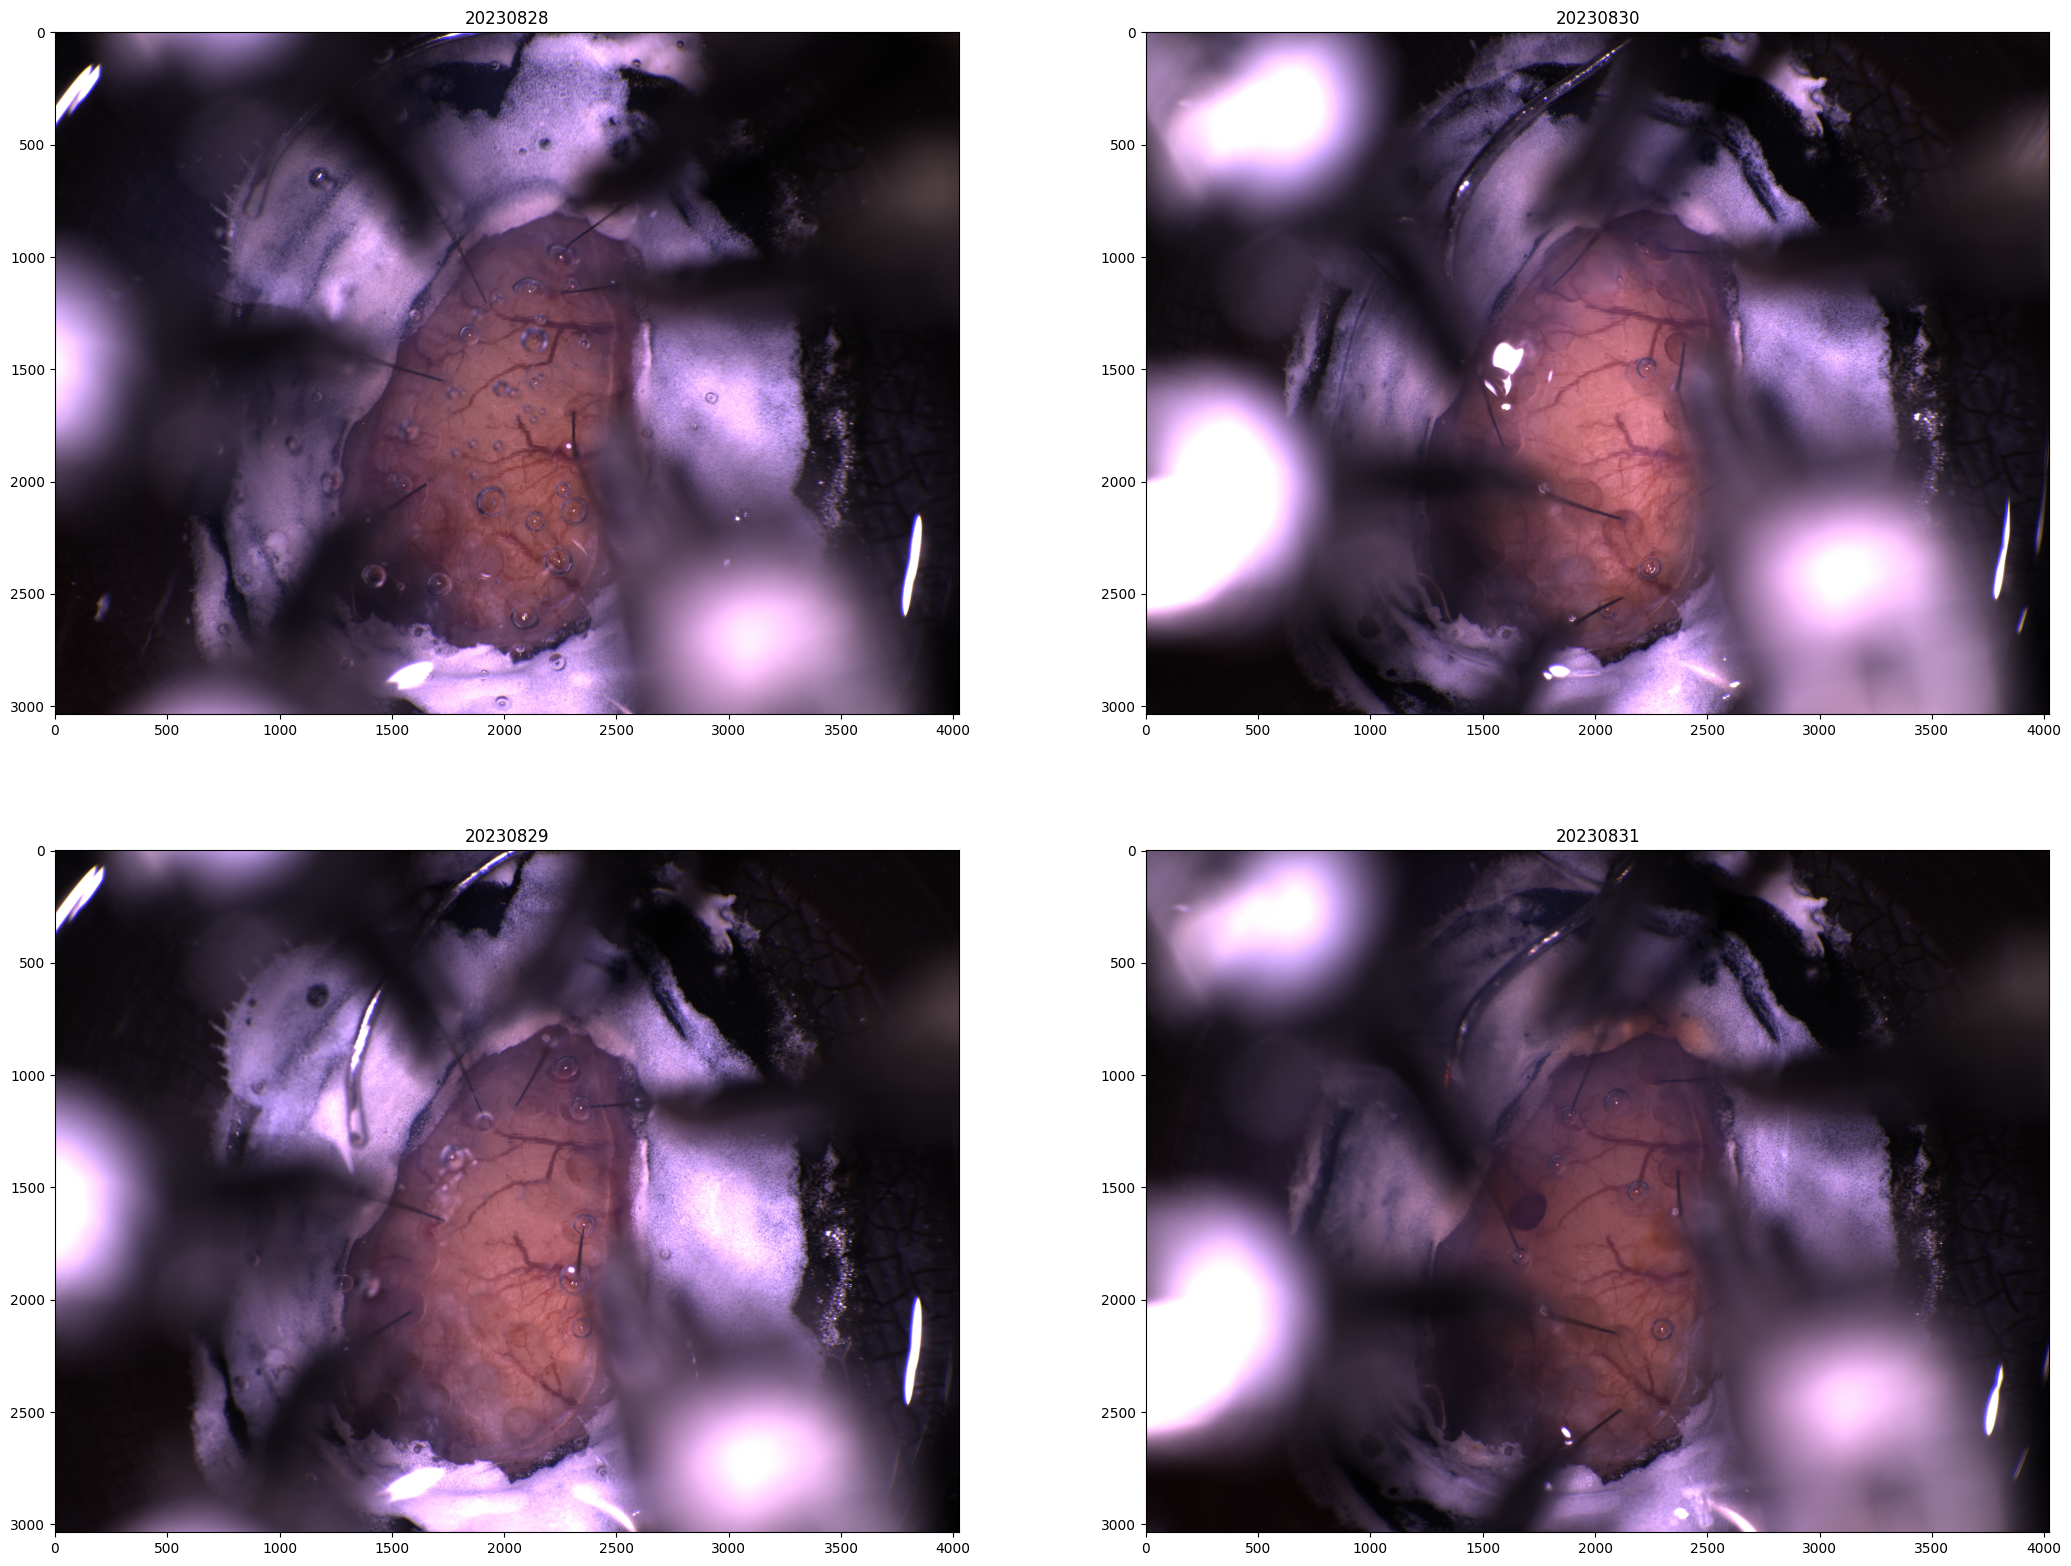

In [25]:
# make image for just one MID
mouse_id = 668755
exps = get_exp_list_dr(mouse_id)
imgs = get_image_path_list_dr(mouse_id, exps)

os.chdir(save_path)
savename = str(mouse_id) + '.png'
make_comp_img(imgs, savename)